In [56]:
import numpy as np 
import pandas 
import thinkplot
import thinkstats2

In [57]:
data=pd.read_csv("temperaturesbarcelonadesde1780.csv")
data.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1,1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
2,1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
3,1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
4,1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    242 non-null    int64  
 1   Temp_Mitjana_Gener     242 non-null    float64
 2   Temp_Mitjana_Febrer    242 non-null    float64
 3   Temp_Mitjana_Marc      242 non-null    float64
 4   Temp_Mitjana_Abril     242 non-null    float64
 5   Temp_Mitjana_Maig      242 non-null    float64
 6   Temp_Mitjana_Juny      242 non-null    float64
 7   Temp_Mitjana_Juliol    242 non-null    float64
 8   Temp_Mitjana_Agost     242 non-null    float64
 9   Temp_Mitjana_Setembre  242 non-null    float64
 10  Temp_Mitjana_Octubre   242 non-null    float64
 11  Temp_Mitjana_Novembre  242 non-null    float64
 12  Temp_Mitjana_Desembre  242 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.7 KB


In [59]:

data.set_index('Any', inplace=True)
data.index.name = 'year'
data['average_temperature'] = data.mean(axis=1)
data = data[['average_temperature']]
data.head()

,average_temperature
year,
1780,14.075000
1781,14.716667
1782,13.633333
1783,14.400000
1784,13.616667


Text(0, 0.5, 'Temperature [°C]')

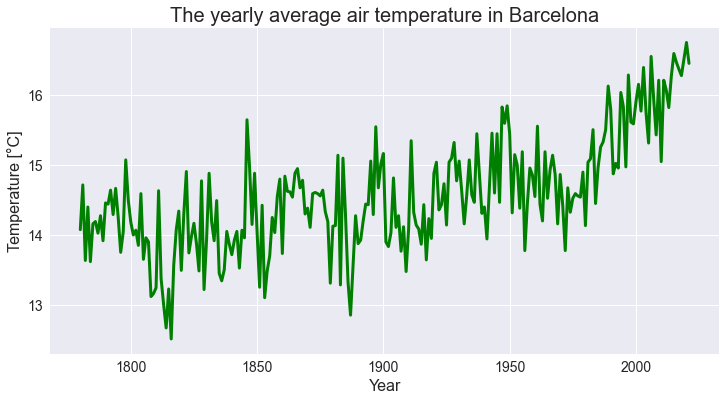

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

# line plot - the yearly average air temperature in Barcelona
data.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

In [61]:
#rolling
data['SMA_10'] = data.average_temperature.rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 year
data['SMA_20'] = data.average_temperature.rolling(20, min_periods=1).mean()

Text(0, 0.5, 'Temperature [°C]')

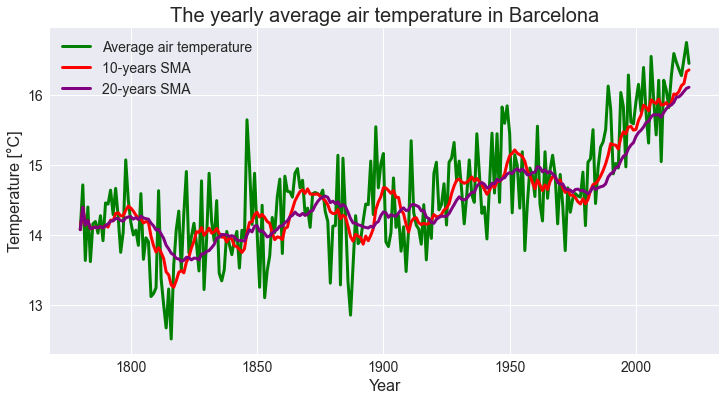

In [72]:
colors = ['green', 'red', 'purple']

# line plot - the yearly average air temperature in Barcelona
data[['average_temperature','SMA_10','SMA_20']].plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)

In [63]:
transaction=pandas.read_csv("mj-clean.csv")
transaction.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [68]:
data['EMA_0.1'] = data.average_temperature.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
data['EMA_0.3'] = data.average_temperature.ewm(alpha=0.3, adjust=False).mean()



Text(0, 0.5, 'Temperature [°C]')

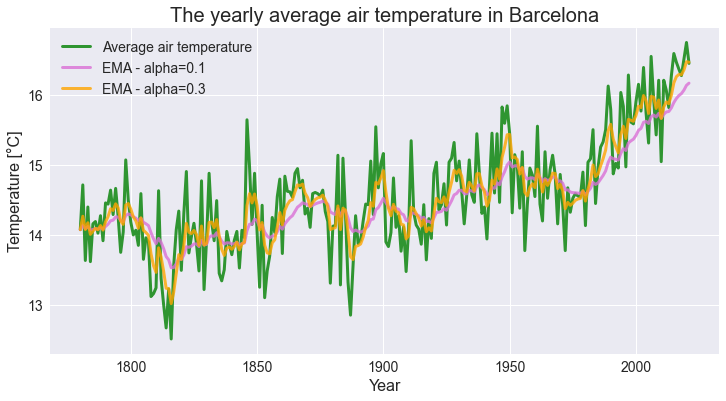

In [69]:
colors = ['green', 'orchid', 'orange']

# line plot - the yearly average air temperature in Barcelona
data[['average_temperature', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average air temperature', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('The yearly average air temperature in Barcelona', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature [°C]', fontsize=16)